# Task 1

## Demographic parity (DP)

$$
\text{DP} = \frac{P(\text{Enrolled} \mid \text{A = Red})}{P(\text{Enrolled} \mid \text{A = Blue})}
$$

$$
P(\text{Enrolled} \mid \text{A = Red}) = 0.5
$$

$$
P(\text{Enrolled} \mid \text{A = Blue}) = \frac{65}{100} = 0.65
$$

$$
\text{DP} = \frac{0.5}{0.65} \approx 0.77 
$$

## Equal opportunity (EO)

$$
\text{EO} = \frac{P(\text{Enrolled} \mid \text{A = Red}, \text{Will use XAI})}{P(\text{Enrolled} \mid \text{A = Blue}, \text{Will use XAI})}
$$

$$
P(\text{Enrolled} \mid \text{A = Red}, \text{Will use XAI}) = \frac{P(\text{Enrolled}, \text{Will use XAI} \mid \text{A = Red})}{P(\text{Will use XAI} \mid \text{A = Red})} = \\ = (\text{independent random variables}) = \frac{P(\text{Enrolled} \mid \text{A = Red}) \cdot P(\text{Will use XAI} \mid \text{A = Red})}{P(\text{Will use XAI} \mid \text{A = Red})} = P(\text{Enrolled} \mid \text{A = Red}) = 0.5
$$

$$
P(\text{Enrolled} \mid \text{A = Blue}, \text{Will use XAI}) = \frac{60}{80} = 0.75
$$

$$
\text{EO} = \frac{0.5}{0.75} = \frac{2}{3}
$$

## Predictive rate parity (PRP)

$$
\text{PRP} = \frac{P(\text{Will use XAI} \mid \text{A = Red}, \text{Enrolled})}{P(\text{Will use XAI} \mid \text{A = Blue}, \text{Enrolled})}
$$

$$
P(\text{Will use XAI} \mid \text{A = Red}, \text{Enrolled}) = 0.5
$$

$$
P(\text{Will use XAI} \mid \text{A = Blue}, \text{Enrolled}) = \frac{60}{65}
$$

$$
PRP = \frac{0.5}{\frac{60}{65}} \approx 0.54
$$

# Task 2

Comparison of the quality (performance) with their fairness coefficients.

### XGBoost

Performance:
```
              precision    recall  f1-score   support

           0       0.69      0.37      0.48       101
           1       0.77      0.93      0.84       229

    accuracy                           0.75       330
   macro avg       0.73      0.65      0.66       330
weighted avg       0.74      0.75      0.73       330
```

Fairness:
```
Statistical parity coefficient 1.21875
Equal opportunity coefficient 1.3125
Predictive parity coefficient 1.2173913043478262
```

### Linear Regression

Performance:
```
              precision    recall  f1-score   support

           0       0.62      0.38      0.47       101
           1       0.77      0.90      0.83       229

    accuracy                           0.74       330
   macro avg       0.69      0.64      0.65       330
weighted avg       0.72      0.74      0.72       330
```

Fairness:
```
Statistical parity coefficient 1.8107142857142857
Equal opportunity coefficient 2.15625
Predictive parity coefficient 1.3461538461538463
```

### XGBoost with resampled data

Performance:
```
              precision    recall  f1-score   support

           0       0.60      0.36      0.45       101
           1       0.76      0.90      0.82       229

    accuracy                           0.73       330
   macro avg       0.68      0.63      0.63       330
weighted avg       0.71      0.73      0.71       330
```

Fairness:
```
Statistical parity coefficient 0.8125
Equal opportunity coefficient 0.829326923076923
Predictive parity coefficient 1.153846153846154
```

### Comparison
XGBoost has the best performance with 75% accuracy. It also is fair with regards to Statistical parity coefficient and Predictive parity coefficient.

Changing a model family to Linear Regression drops performance and fairness.

Resampling mitigation method caused the model to be more fair. But the accuracy dropped from 75% to 73%. So it is trade off.

### Conclusion
The conclusion is that both model choice and data preparation matters in case of fairness.

XGBoost is considered to be a strong model and it is more fair then simpler Linear Regression model. 

It seems to exists a trade off between model performance and model fairness.

## Subtask 2.1

In [51]:
import dalex as dx
import pandas as pd
import sklearn
import xgboost
from sklearn.model_selection import train_test_split

In [86]:
german_credit = dx.datasets.load_german()

In [87]:
german_credit

,risk,sex,job,housing,saving_accounts,checking_account,credit_amount,duration,purpose,age
0,1,male,2,own,not_known,little,1169,6,radio/TV,67
1,0,female,2,own,little,moderate,5951,48,radio/TV,22
2,1,male,1,own,little,not_known,2096,12,education,49
3,1,male,2,free,little,little,7882,42,furniture/equipment,45
4,0,male,2,free,little,little,4870,24,car,53
...,...,...,...,...,...,...,...,...,...,...
995,1,female,1,own,little,not_known,1736,12,furniture/equipment,31
996,1,male,3,own,little,little,3857,30,car,40
997,1,male,2,own,little,not_known,804,12,radio/TV,38
998,0,male,2,free,little,little,1845,45,radio/TV,23


In [88]:
# Convert object columns to category
for col in german_credit.select_dtypes(include='object').columns:
    german_credit[col] = german_credit[col].astype('category')

# Verify the changes
german_credit.dtypes

risk                   int64
sex                 category
job                    int64
housing             category
saving_accounts     category
checking_account    category
credit_amount          int64
duration               int64
purpose             category
age                    int64
dtype: object

In [89]:
# Data splitting
X = german_credit.drop(columns='risk')
X = pd.get_dummies(X, columns=["sex"], drop_first=True)

y = german_credit.risk
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.33, random_state=42)

In [90]:
model = xgboost.XGBClassifier(
    n_estimators=50, 
    max_depth=2,
    eval_metric="logloss",
    enable_categorical=True,
    tree_method="hist"
)

In [91]:
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=True, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=2,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=50,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

## Subtask 2.2

In [137]:
y_pred_xgboost = model.predict(X_test)

print(sklearn.metrics.classification_report(y_test, y_pred_xgboost))

              precision    recall  f1-score   support

           0       0.69      0.37      0.48       101
           1       0.77      0.93      0.84       229

    accuracy                           0.75       330
   macro avg       0.73      0.65      0.66       330
weighted avg       0.74      0.75      0.73       330



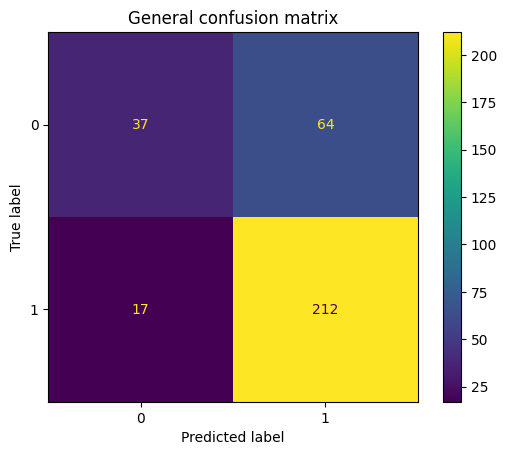

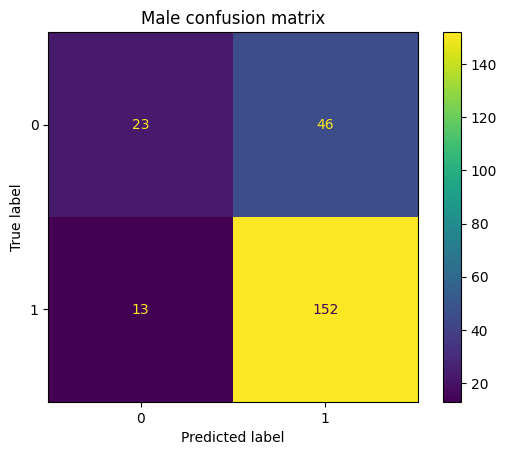

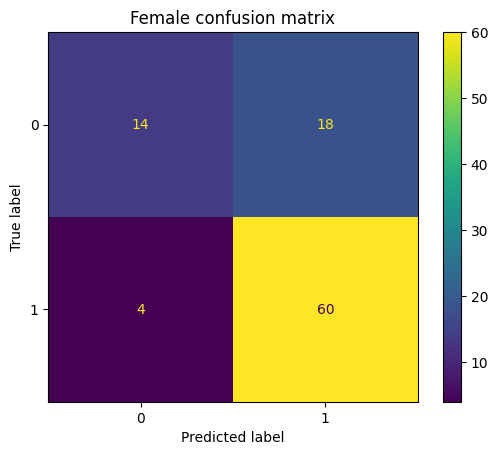

In [138]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

general_cm = confusion_matrix(y_test, y_pred_xgboost)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("General confusion matrix")
plt.show()

male_mask = X_test["sex_male"] == 1

male_cm = confusion_matrix(y_test[male_mask], y_pred_xgboost[male_mask])
disp = ConfusionMatrixDisplay(confusion_matrix=male_cm)
disp.plot()
plt.title("Male confusion matrix")
plt.show()

female_cm = confusion_matrix(y_test[~male_mask], y_pred_xgboost[~male_mask])
disp = ConfusionMatrixDisplay(confusion_matrix=female_cm)
disp.plot()
plt.title("Female confusion matrix")
plt.show()


In [139]:
# Statistical parity

def fairness(y_true, y_pred, privileged_mask):
    privileged_cm = confusion_matrix(y_true[privileged_mask], y_pred[privileged_mask])
    unprivileged_cm = confusion_matrix(y_true[~privileged_mask], y_pred[~privileged_mask])
    
    privileged_statistical_parity = (privileged_cm[0, 0] + privileged_cm[1, 0]) / privileged_cm.sum()
    privileged_equal_opportunity = privileged_cm[0, 0] / (privileged_cm[0, 0] + privileged_cm[0, 1])
    privileged_predictive_parity = privileged_cm[0, 0] / (privileged_cm[0, 0] + privileged_cm[1, 0])
    
    unprivileged_statistical_parity = (unprivileged_cm[0, 0] + unprivileged_cm[1, 0]) / unprivileged_cm.sum()
    unprivileged_equal_opportunity = unprivileged_cm[0, 0] / (unprivileged_cm[0, 0] + unprivileged_cm[0, 1])
    unprivileged_predictive_parity = unprivileged_cm[0, 0] / (unprivileged_cm[0, 0] + unprivileged_cm[1, 0])
    
    print("Statistical parity coefficient", unprivileged_statistical_parity / privileged_statistical_parity)
    print("Equal opportunity coefficient", unprivileged_equal_opportunity / privileged_equal_opportunity)
    print("Predictive parity coefficient", unprivileged_predictive_parity / privileged_predictive_parity)

In [140]:
fairness(y_test, y_pred_xgboost, male_mask)

Statistical parity coefficient 1.21875
Equal opportunity coefficient 1.3125
Predictive parity coefficient 1.2173913043478262


## Subtask 2.3

In [142]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Define the column transformer with one-hot encoding and normalization
ct = ColumnTransformer([
    ("onehot", OneHotEncoder(), ['housing', 'saving_accounts', 'checking_account', 'purpose']),
    ("scaler", StandardScaler(), ['credit_amount', 'duration', 'age'])
], remainder='passthrough')

# Create a pipeline with preprocessing and logistic regression
logistic_regression_pipeline = Pipeline(steps=[
    ('preprocessor', ct),
    ('classifier', LogisticRegression())
])

# Fit the pipeline on the training data
logistic_regression_pipeline.fit(X_train, y_train)

# Predict on the test data
y_pred_logistic = logistic_regression_pipeline.predict(X_test)

# Print the classification report
print(sklearn.metrics.classification_report(y_test, y_pred_logistic))

              precision    recall  f1-score   support

           0       0.62      0.38      0.47       101
           1       0.77      0.90      0.83       229

    accuracy                           0.74       330
   macro avg       0.69      0.64      0.65       330
weighted avg       0.72      0.74      0.72       330



In [143]:
fairness(y_test, y_pred_logistic, male_mask)

Statistical parity coefficient 1.8107142857142857
Equal opportunity coefficient 2.15625
Predictive parity coefficient 1.3461538461538463


## Subtask 2.4

In [157]:
from dalex.fairness import resample
from copy import copy

protected_variable_train = X_train.sex_male.apply(lambda x: "male" if x else "female")
protected_variable = X_test.sex_male.apply(lambda x: "male" if x else "female")
privileged_group = "male"

# resample
indices_resample = resample(
    protected_variable_train, 
    y_train, 
    type='preferential', # uniform
    probs=model.predict_proba(X_train)[:, 1], # requires probabilities
    verbose=False
)
model_resample = copy(model)
model_resample.fit(X_train.iloc[indices_resample, :], y_train.iloc[indices_resample])

y_pred_resample = model_resample.predict(X_test)

In [158]:
fairness(y_test, y_pred_resample, male_mask)

Statistical parity coefficient 0.8125
Equal opportunity coefficient 0.829326923076923
Predictive parity coefficient 1.153846153846154


In [159]:
print(sklearn.metrics.classification_report(y_test, y_pred_resample))

              precision    recall  f1-score   support

           0       0.60      0.36      0.45       101
           1       0.76      0.90      0.82       229

    accuracy                           0.73       330
   macro avg       0.68      0.63      0.63       330
weighted avg       0.71      0.73      0.71       330



## Subtask 2.5

Comparison of the quality (performance) with their fairness coefficients.

### XGBoost

Performance:
```
              precision    recall  f1-score   support

           0       0.69      0.37      0.48       101
           1       0.77      0.93      0.84       229

    accuracy                           0.75       330
   macro avg       0.73      0.65      0.66       330
weighted avg       0.74      0.75      0.73       330
```

Fairness:
```
Statistical parity coefficient 1.21875
Equal opportunity coefficient 1.3125
Predictive parity coefficient 1.2173913043478262
```

### Linear Regression

Performance:
```
              precision    recall  f1-score   support

           0       0.62      0.38      0.47       101
           1       0.77      0.90      0.83       229

    accuracy                           0.74       330
   macro avg       0.69      0.64      0.65       330
weighted avg       0.72      0.74      0.72       330
```

Fairness:
```
Statistical parity coefficient 1.8107142857142857
Equal opportunity coefficient 2.15625
Predictive parity coefficient 1.3461538461538463
```

### XGBoost with resampled data

Performance:
```
              precision    recall  f1-score   support

           0       0.60      0.36      0.45       101
           1       0.76      0.90      0.82       229

    accuracy                           0.73       330
   macro avg       0.68      0.63      0.63       330
weighted avg       0.71      0.73      0.71       330
```

Fairness:
```
Statistical parity coefficient 0.8125
Equal opportunity coefficient 0.829326923076923
Predictive parity coefficient 1.153846153846154
```

### Comparison
XGBoost has the best performance with 75% accuracy. It also is fair with regards to Statistical parity coefficient and Predictive parity coefficient.

Changing a model family to Linear Regression drops performance and fairness.

Resampling mitigation method caused the model to be more fair. But the accuracy dropped from 75% to 73%. So it is trade off.

## Subtask 2.6

The conclusion is that both model choice and data preparation matters in case of fairness.

XGBoost is considered to be a strong model and it is more fair then simpler Linear Regression model. 

It seems to exists a trade off between model performance and model fairness. `